### Extração de texto do certificado Udemy

In [1]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

import pytesseract

import pdf2image

from pdf2image import convert_from_path
from pdf2image.exceptions import PDFPageCountError

##### Funções básicas

In [2]:
path = r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\010-pytesseract\others'

In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [4]:
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tesseract.exetessdata"'

In [5]:
# Variaveis
INFO_LIMPO = []
NOME = []
LOGCORROMPIDO = []

# Funcoes basicas
def verificar_pasta(caminho:str) -> str:
    # Verificar se pasta Repositorio existe

    if caminho == False:
        print(f'A pasta {caminho} não existe. Criando diretório.')
        os.mkdir(caminho)

    else:
        print(f'A pasta {caminho} existe')

verificar_pasta(path)
pdfs_files = glob(path + r'\*.pdf')

A pasta C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\010-pytesseract\others existe


In [6]:
pdfs_files

['C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy (1).pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-2.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-3.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-4.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-5.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-6.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-7.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1	11	1096	45	3	21	93.306252	|
5	1	1	1	1	12	1108	45	106	21	76.346748	FlipHTML5
2	1	2	0	0	0	275	295	935	2	-1	
3	1	2	1	0	0	275	295	935	2	-1	
4	1	2	1	1	0	275	295	935	2	-1	
5	1	2	1	1	1	275	295	935	2	95.000000	 
2	1	3	0	0	0	295	490	1128	168	-1	
3	1	3	1	0	0	295	490	1128	168	-1	
4	1	3	1	1	0	295	490	1128	66	-1	
5	1	3	1	1	1	295	508	87	33	96.958458	This
5	1	3	1	1	2	395	509	33	32	96.936966	is
5	1	3	1	

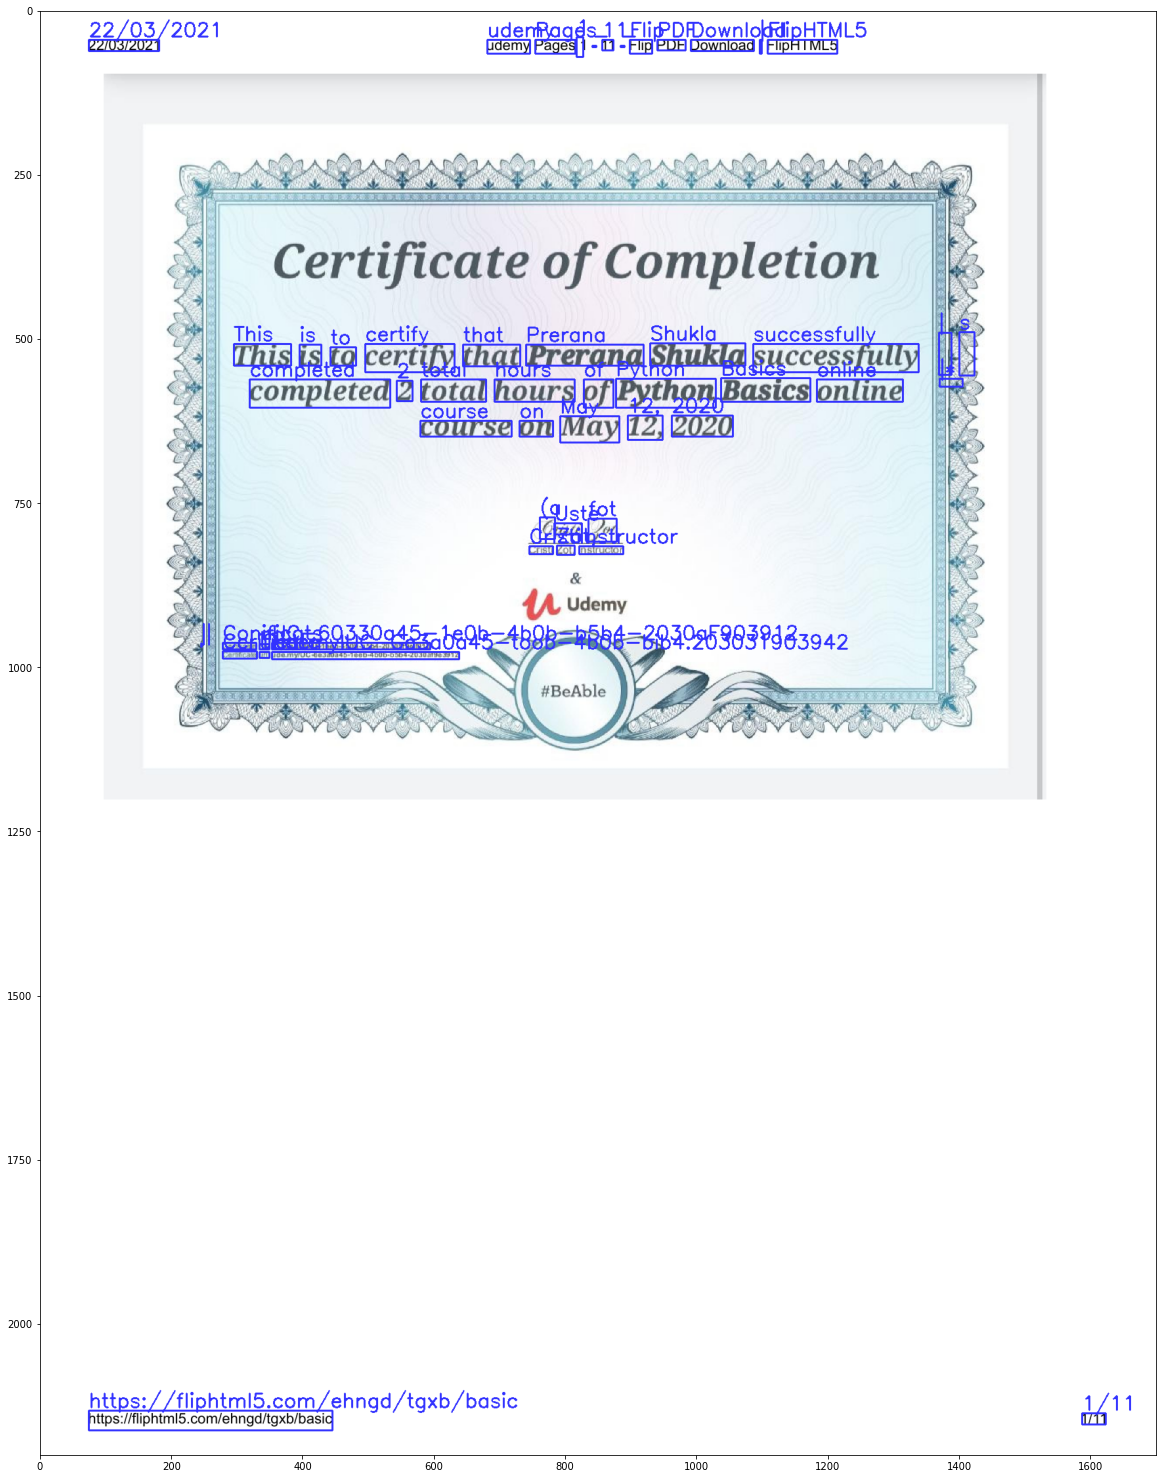

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

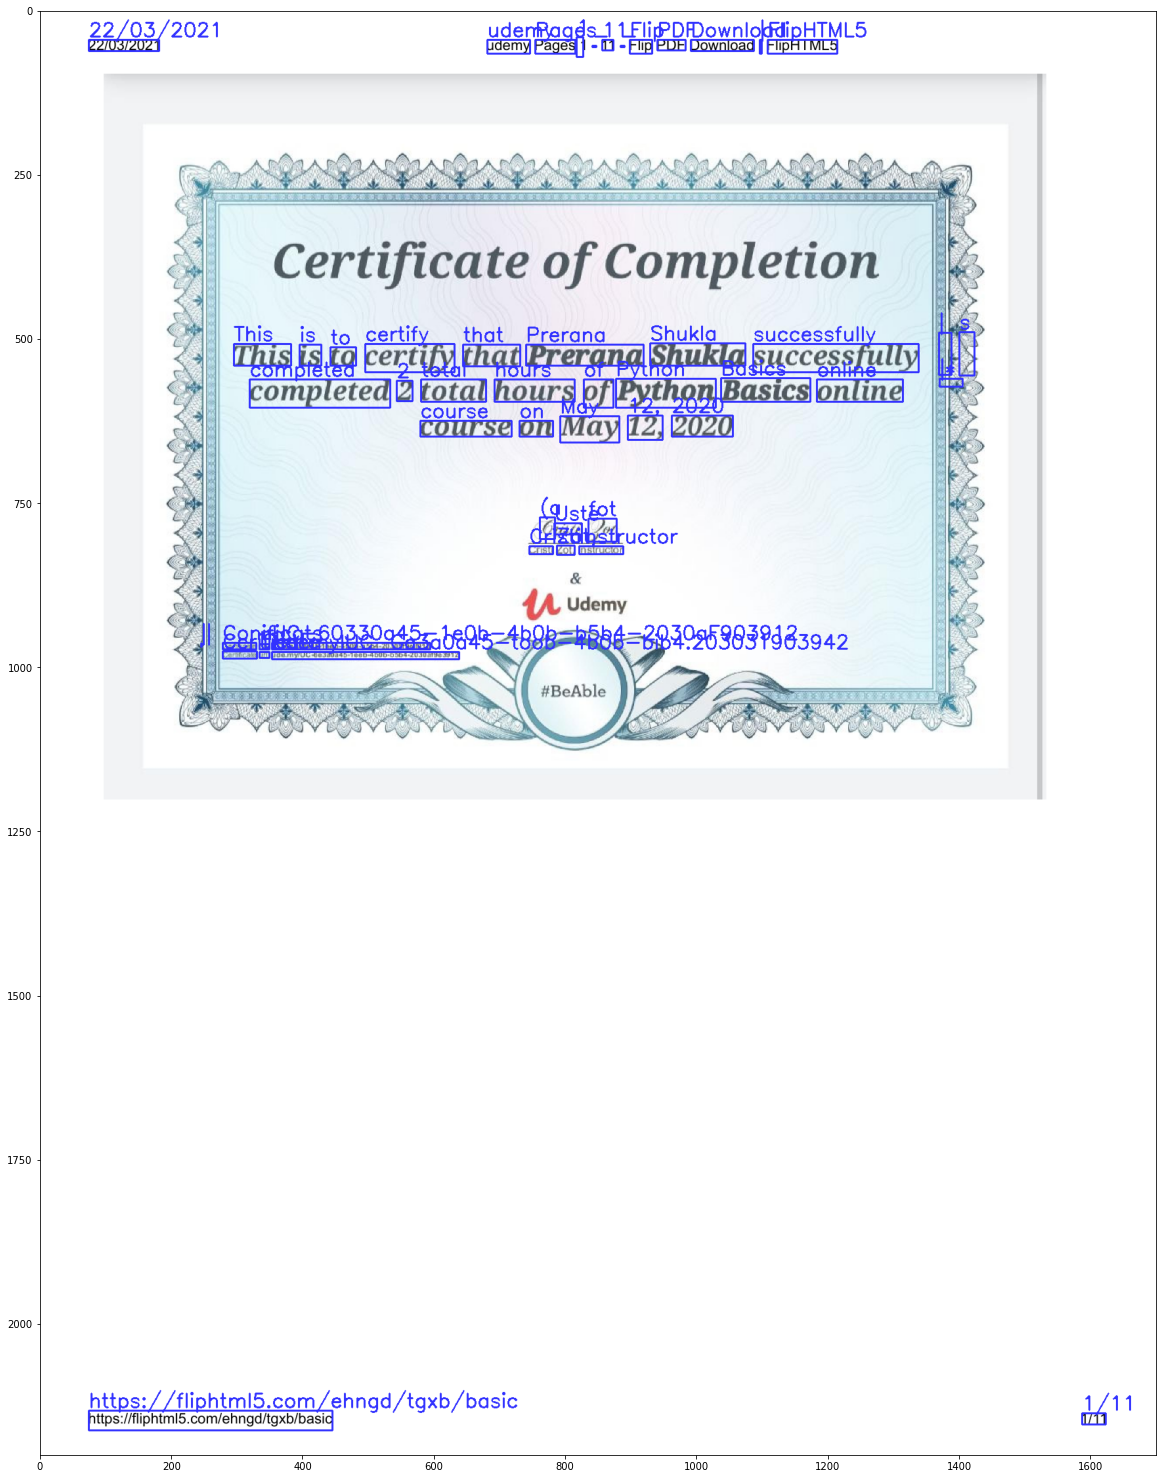

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

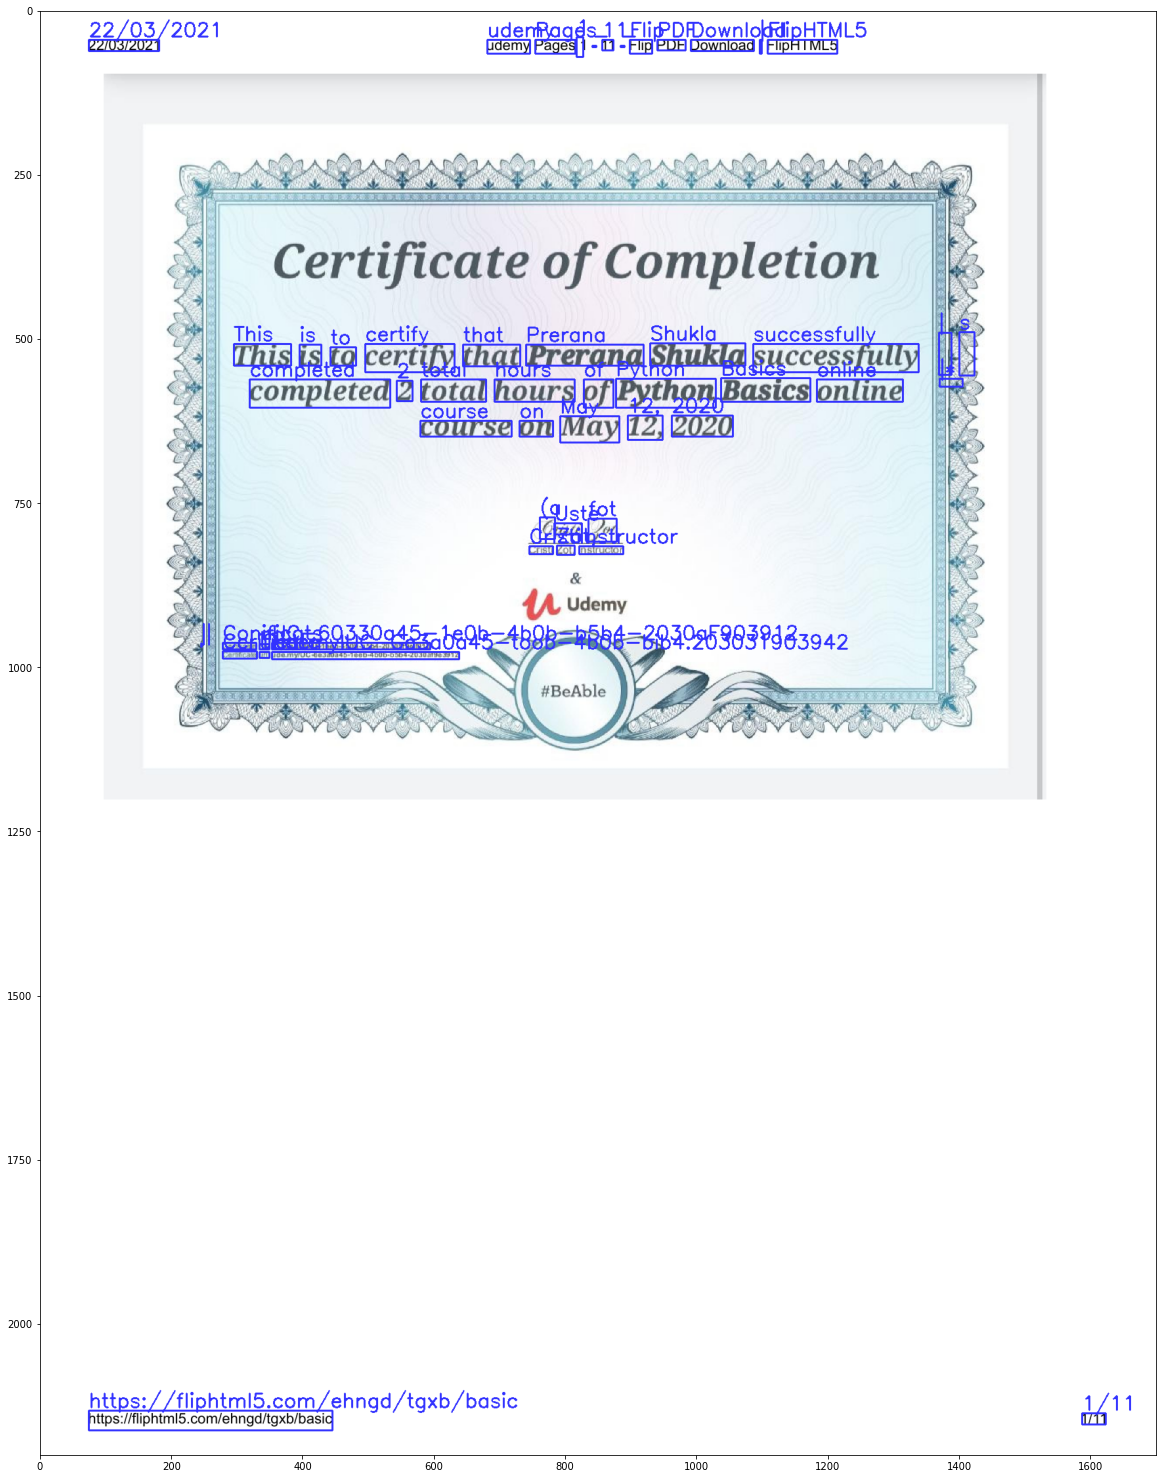

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

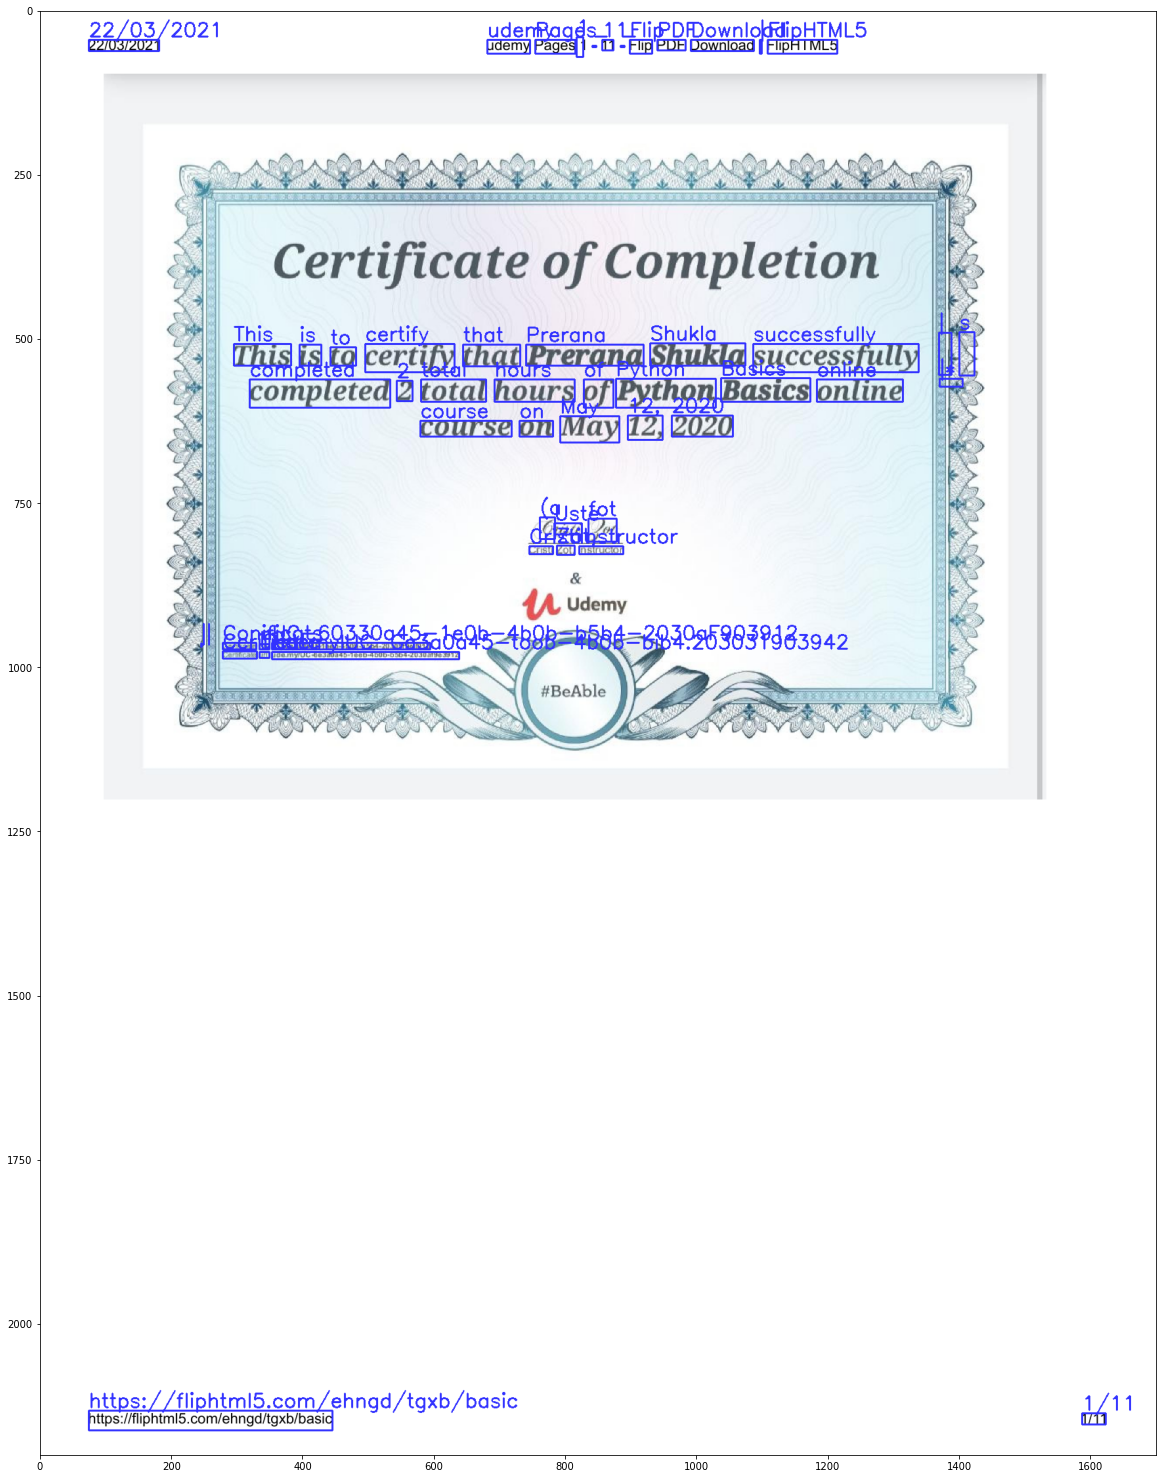

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

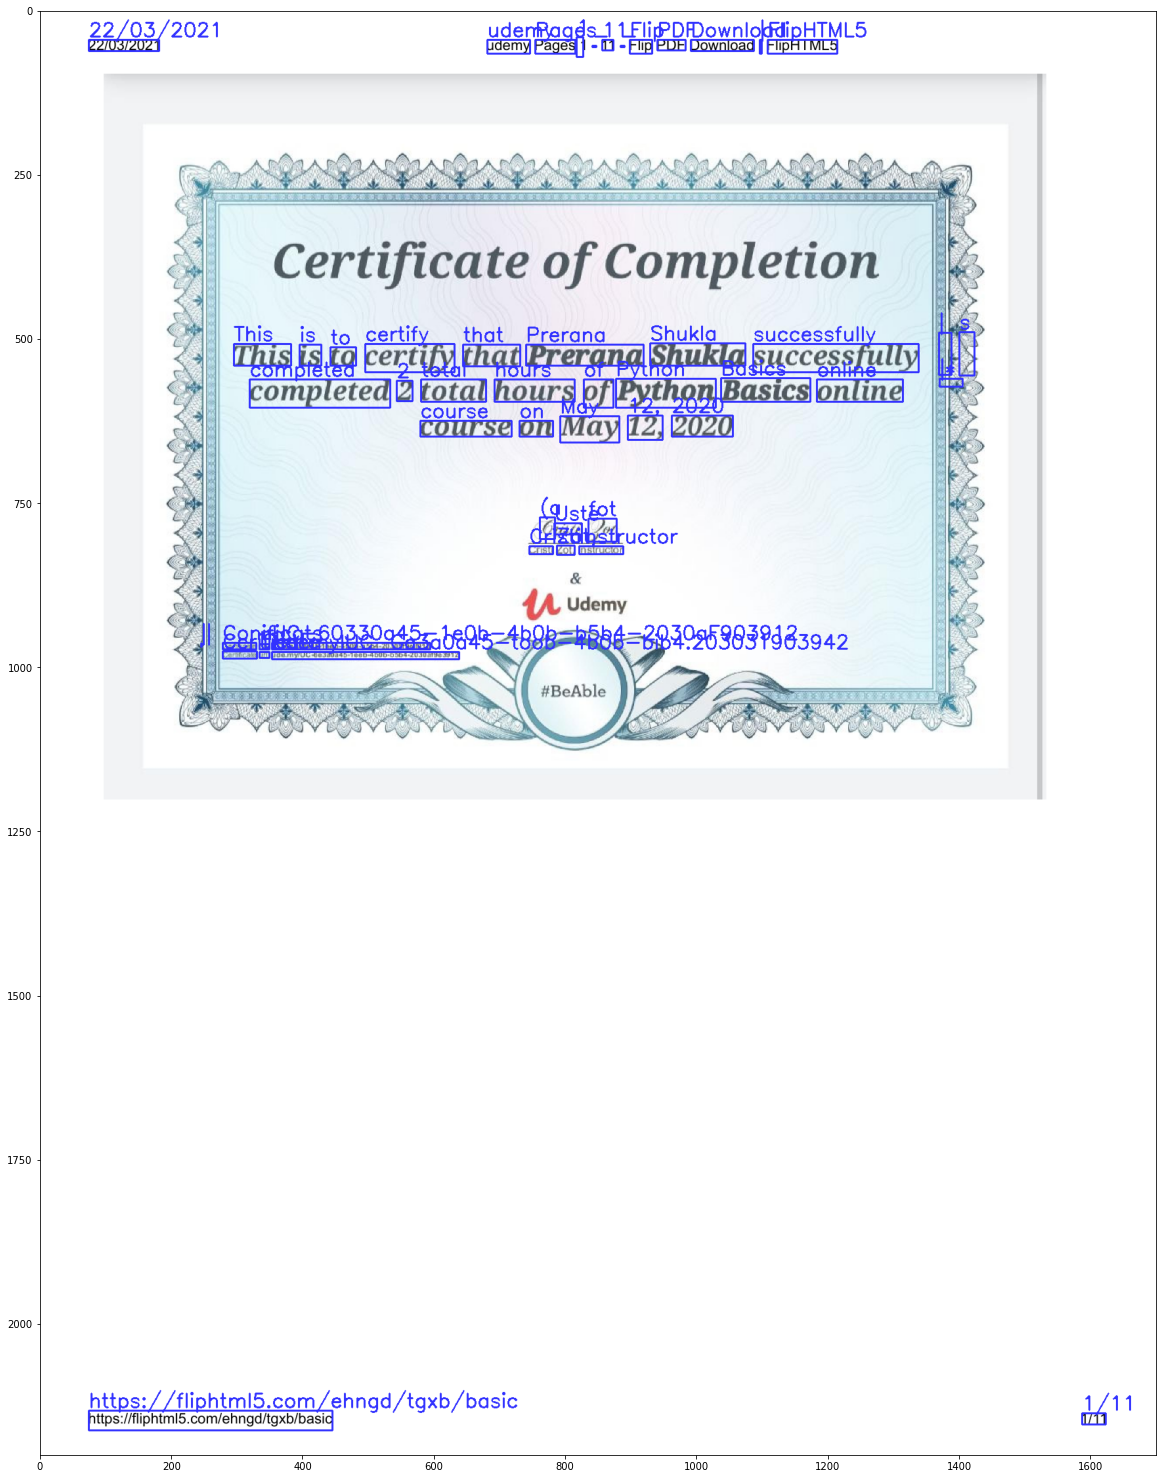

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

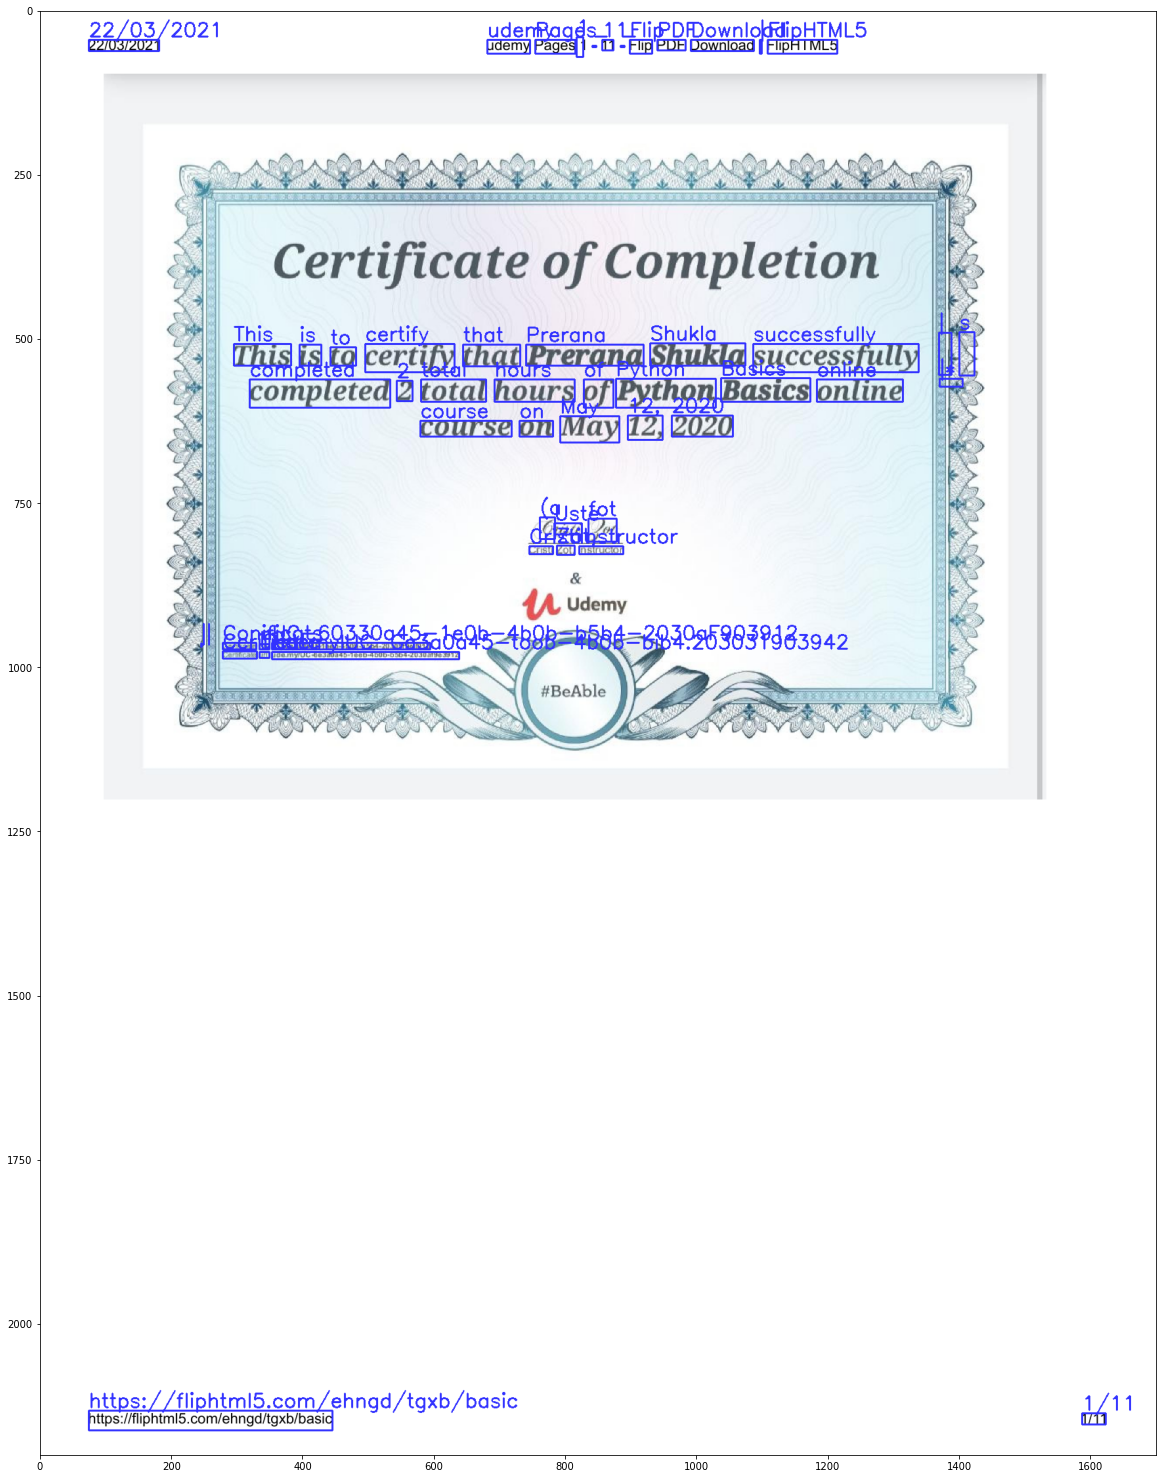

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

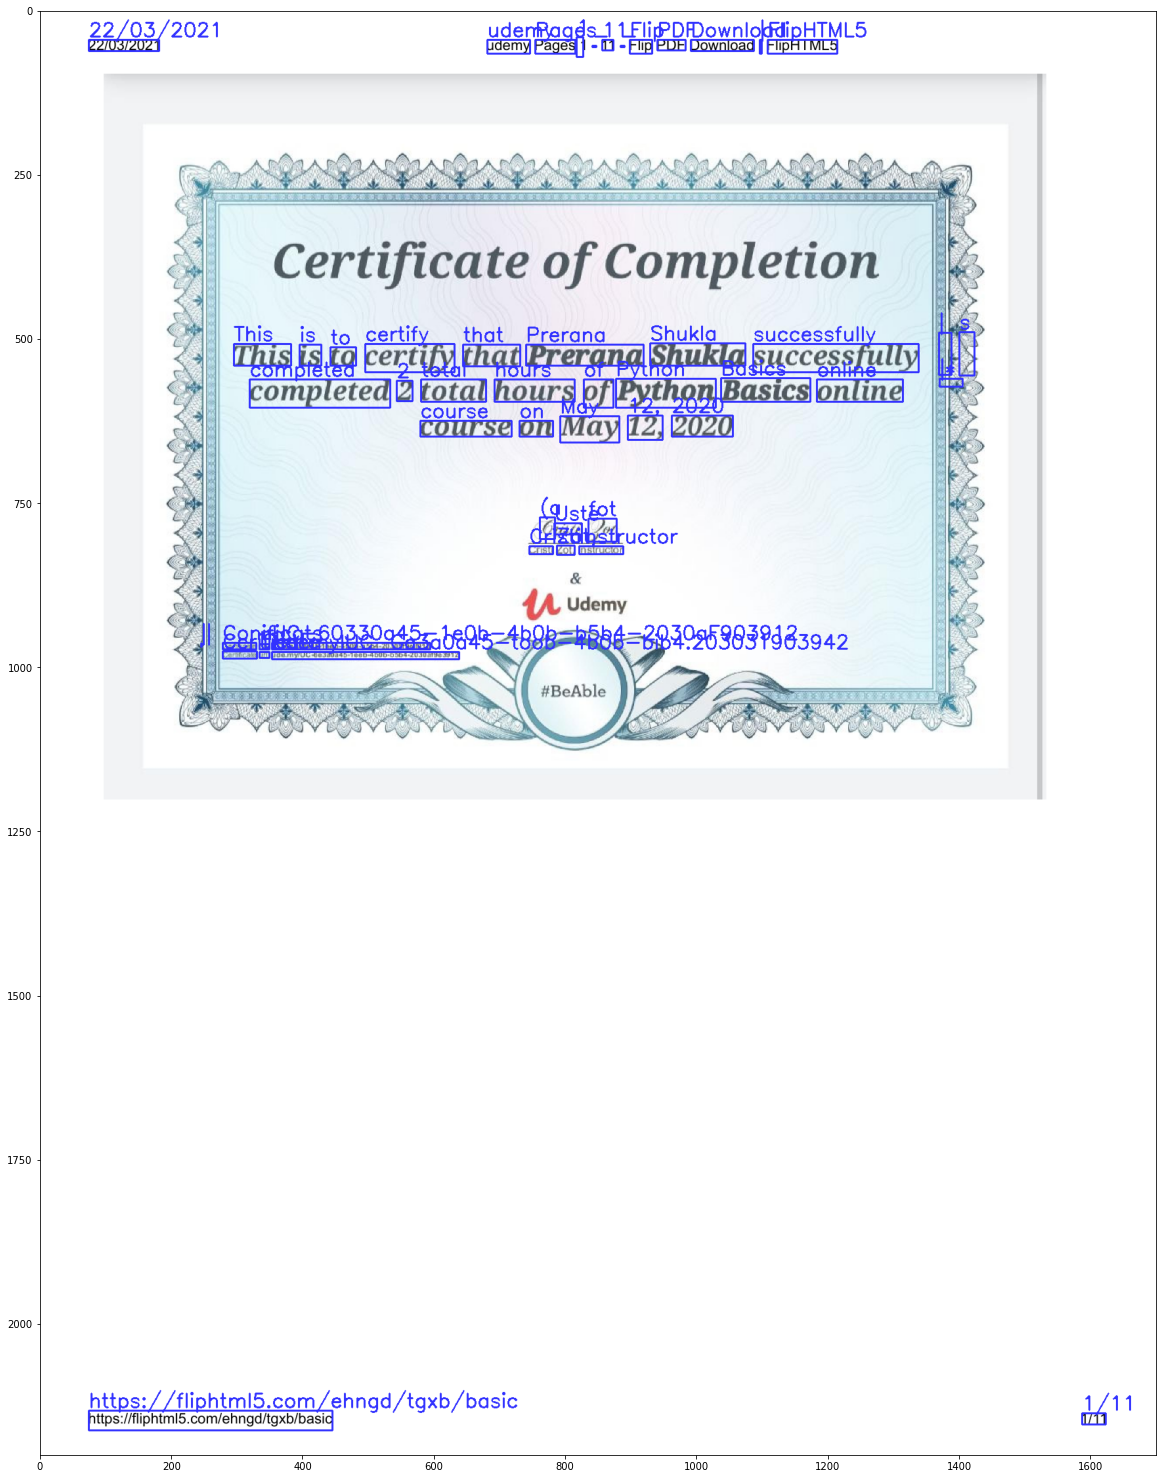

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1

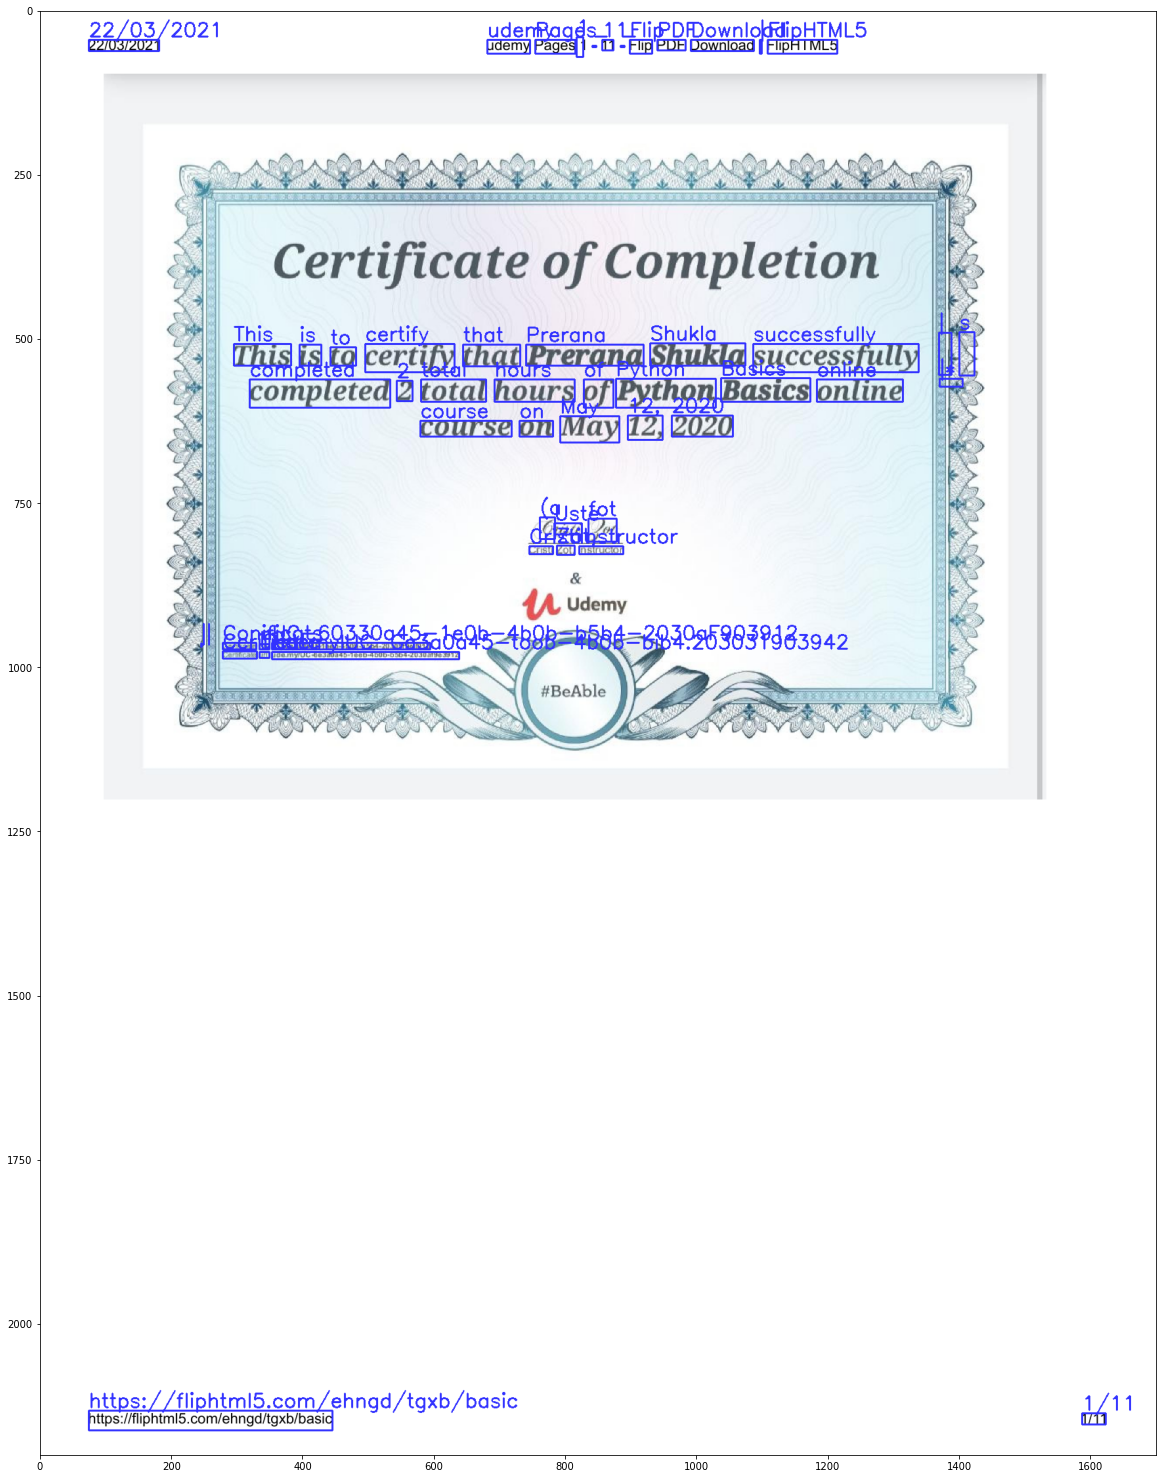

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11


In [21]:
for fn in range(len(pdfs_files)):

    fn=0

    try:
        # Converter pdf para imagem
        images = convert_from_path(pdfs_files[fn], poppler_path=r'C:\Users\shuel\Downloads\poppler-0.68.0_x86\poppler-0.68.0\bin')
    except PDFPageCountError as e:
        print('Não foi possísvel ler o pdf. Corrompido')
        LOGCORROMPIDO.append(pdfs_files[fn])
        pass
    
    for i in range(len(images)):
        images[i].save('page.png', 'PNG')
    
    # Leitura da imagem
    img = cv2.imread('page.png', cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    try:

        # Encontrar as palavras na imagem
        boxes = pytesseract.image_to_data(img, lang='eng')
        INFO = [] # Armazenar as informações obtidas da imagem-pdf

        # Encontrar boxes com as infos
        for a,b in enumerate(boxes.splitlines()):
            print(b)
            if a != 0:
                b = b.split()
                if len(b) == 12:
                    INFO.append(b)
                    x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
                    cv2.putText(img, b[11], (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (50,50,255), 2)
                    cv2.rectangle(img, (x,y), (x+w, y+h), (50,50,255), 2)
        fig = plt.figure(figsize=(20,50))
        ax1 = fig.add_subplot()
        plt.imshow(img)
        plt.show()

        # Limpando as informacoes dos boxes
        INFO_LIMPO = []
        for i in range (len(INFO)):
            INFO_LIMPO.append(INFO[i][-1])

        INFO_LIMPO = ' '.join(INFO_LIMPO)
        print(INFO_LIMPO)

    except:
        print('Não foi possível ler o pdf')

    try:
    # Nome do aluno
        NOME.append(re.search(r"certify that (.*[A-Za-z\s]) successfully", INFO_LIMPO).group(1))
    except AttributeError:
        print('Nome não encontrado')


In [20]:
try:
    # Nome do aluno
    NOME.append(re.search(r"certify that (.*[A-Za-z\s]) successfully", INFO_LIMPO).group(1))
except AttributeError:
    print('Nome não encontrado')

In [22]:
df = pd.DataFrame({'Nome': NOME})
df

Nome
0   Prerana Shukla
1   Prerana Shukla
2   Prerana Shukla
3   Prerana Shukla
4   Prerana Shukla
5   Prerana Shukla
6   Prerana Shukla
7   Prerana Shukla
8   Prerana Shukla
9   Prerana Shukla
10  Prerana Shukla
11  Prerana Shukla

In [ ]:
#TODO: Tenho que ajeitar o laço for e conseguir tirar mais informações da imagem usando REGEX